## 14.385 Fall 2018 Problem Set 1


In [57]:

import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize

import seaborn as sns

import matplotlib.pyplot as plt

In [58]:
import scipy.stats
import scipy.optimize
from scipy.signal import argrelextrema

## Problem 4.2.A
Simulate a sample of 1000 observations, plot objective function for each of the three estimators
set B = 0, error = Normal(0, st_dev=3) , y = x*B, L =1, x_uniform[0, 4]

In [3]:
L = 1
SCALE = 3
B = 0

In [5]:
# seed the generator
np.random.seed(10)

x = np.random.uniform(0, 4, 1000)
e = np.random.normal(loc=0.0, scale=SCALE, size=1000)
y = e
y[y>1].shape

(366,)

In [6]:
betas = np.arange(-5,5, .25)

In [7]:
def obj_OLS(beta, x, y_actual, L=L):
    y_hat = beta*x
    n = x.shape[0]
    return 1/n*np.sum(np.square(y_actual-y_hat))


In [8]:
def obj_MLE(beta, x, y_actual, L=L, sigma=SCALE):
    n = y.shape[0]
    y_lt_L = np.log(1/sigma*(scipy.stats.norm.pdf((y_actual - beta*x)/sigma)))
    y_ge_L = np.log(1-scipy.stats.norm.cdf((L - beta*x)/sigma))
    return -np.sum(np.where(y_actual<L, y_lt_L, y_ge_L))
    
    
            

In [9]:
def obj_MLE_unknow_var(params, x, y_actual, L=L):
    beta, t = params[0], params[1]
    y_lt_L = np.log(t*(scipy.stats.norm.pdf((y_actual - beta*x)*t)))
    y_ge_L = np.log(1-scipy.stats.norm.cdf((L - beta*x)*t))
    return -np.sum(np.where(y_actual<L, y_lt_L, y_ge_L))
    

In [10]:
def obj_CLAD(beta, x, y_actual, L=L):
    y_pred = np.minimum(beta*x, L)
    n = y.shape[0]
    return (1/n)*np.sum(np.abs(y_actual - y_pred))


In [11]:
def gen_sim42a(seed, betas):
    # seed the generator
    np.random.seed(seed)
    x = np.random.uniform(0, 4, 1000)
    e = np.random.normal(loc=0.0, scale=SCALE, size=1000)
    y_actual = np.minimum(0*x+e, L)
    ols = np.array(list(map(lambda b: obj_OLS(b, x, y_actual, L), betas))).reshape(-1,1)
    mle = np.array(list(map(lambda b: obj_MLE(b, x, y_actual, L, SCALE), betas))).reshape(-1,1)
    clad = np.array(list(map(lambda b: obj_CLAD(b, x, y_actual, L), betas))).reshape(-1,1)
    return pd.DataFrame(data=np.hstack([ols, mle, clad]), index=betas, columns=["OLS", "MLE", "CLAD"])

In [20]:
sim_res1 = gen_sim42a(10, betas)
sim_res2 = gen_sim42a(100, betas)
sim_res3 = gen_sim42a(13, betas)

### Plots of objective function for difference values of Beta and check if CLAD always has local min

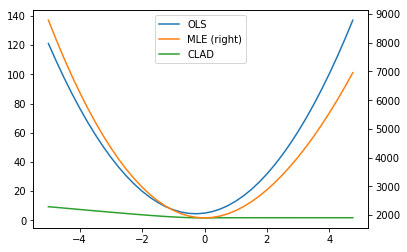

In [13]:
sim_res1.plot(secondary_y="MLE")

In [18]:
# checks if more than 1 local minima
argrelextrema(sim_res1.CLAD.values, np.less)

(array([20]),)

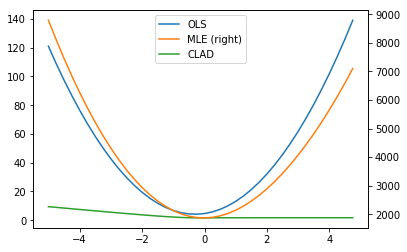

In [21]:
sim_res2.plot(secondary_y="MLE")

In [22]:
# checks if more than 1 local minima
argrelextrema(sim_res2.CLAD.values, np.less)

(array([20]),)

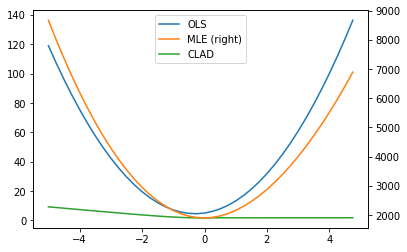

In [23]:
sim_res3.plot(secondary_y="MLE")

In [27]:
# checks if more than 1 local minima
argrelextrema(sim_res3.CLAD.values, np.less)

(array([20]),)

In [28]:
sim_res3.iloc[20]

OLS        4.987938
MLE     1898.196256
CLAD       1.658971
Name: 0.0, dtype: float64

#### In all three simulations, CLAD's local mimima is at b=0 and there is only one local minima!

## Problem 4.2.B
Simulate 500 samples of 1000 observations, for each sample, compute the three estimates. Report the mean, median and st. dev of the estimates across each sample. 
Describe which algo you use to compute the CLAD solution. Treat sigma as an unknown parameter. 

In [53]:
def gen_iteration4b(guess, L=L):
    x = np.random.uniform(0, 4, 1000)
    e = np.random.normal(loc=0.0, scale=SCALE, size=1000)
    y_actual = np.minimum(0*x+e, L)
    res_ols = scipy.optimize.minimize(obj_OLS, x0=guess[0], args=(x, y_actual, L))
    res_MLE = scipy.optimize.minimize(obj_MLE_unknow_var, guess, args=(x, y_actual, L))
    res_CLAD = scipy.optimize.minimize(obj_CLAD, x0=guess[0], args=(x, y_actual, L), method='Nelder-Mead')  
    return [res_ols.x[0], res_MLE.x[0],  res_MLE.x[1], res_CLAD.x, res_ols.success, res_MLE.success, res_CLAD.success]



In [54]:
sim_res4b = list((gen_iteration4b([0,1], L=1) for i in np.arange(0, 500, 1)))
    

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWar

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

In [55]:
results_df = pd.DataFrame(np.array(sim_res4b).T,[
    'ols_b', 'mle_b', 'mle_stdev', 'clad_b', 'ols_success', 'mle_success', 'clad_success']).T

In [56]:
results_df.mean()

ols_b          -0.284681
mle_b           7.606482
mle_stdev      -5.309286
clad_b          0.001188
ols_success     1.000000
mle_success     0.252000
clad_success    1.000000
dtype: float64

In [44]:
results_df.median()

ols_b          -0.285128
mle_b           1.896878
mle_stdev      -1.540899
clad_b         -0.000933
ols_success     1.000000
mle_success     0.000000
clad_success    1.000000
dtype: float64

In [45]:
results_df.std()

ols_b            0.028916
mle_b           68.174746
mle_stdev       62.011091
clad_b           0.050360
ols_success      0.000000
mle_success      0.000000
clad_success     0.000000
dtype: float64

### Discussion of CLAD Minimization Algorithm

    I'm using the Nelder Mead or simplex search algorithm one of the best known algorithms for multidimensional unconstrained optimization without derivatives.  

    Here, I wanted to use a minimization function that used an iterative approach, because no analytical solution exists for the LAD, so the Nelder Mead seemed like a good option. 

    The method then performs a sequence of transformations of the working simplex S, aimed at decreasing the function values at its vertices. At each step, the transformation is determined by computing one or more test points, together with their function values, and by comparison of these function values with those at the vertices.

    This process is terminated when the working simplex S becomes sufficiently small.

    Similar to gradient descent algorithms like ADA-grad, this algorithm will take larger or smaller steps depending on the gradient of the functions, so that it can iterate to a minimum more quickly and takes smaller steps in valleys so it doesn't overshoot the minima. 

## 4.2.c 
repeat exercise from earlier, but error should be from uniform distribution (so that variance of estimator is 9)

In [284]:
def gen_iteration4c(guess, L=L):
    x = np.random.uniform(0, 4, 1000)
    e = np.random.uniform(-3*np.sqrt(3), 3*np.sqrt(3), size=1000)
    y_actual = np.minimum(0*x+e, L)
    res_ols = scipy.optimize.minimize(obj_OLS, x0=guess[0], args=(x, y_actual, L))
    res_MLE = scipy.optimize.minimize(obj_MLE_unknow_var, guess, args=(x, y_actual, L))
    res_CLAD = scipy.optimize.minimize(obj_CLAD, x0=guess[0], args=(x, y_actual, L), method='Nelder-Mead')  
    return [res_ols.x[0], res_MLE.x[0],  res_MLE.x[1], res_CLAD.x[0], res_ols.success, res_MLE.success, res_CLAD.success]


In [285]:
sim_res4c = list((gen_iteration4c([0,1], L=1) for i in np.arange(0, 500, 1)))
    

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by 

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: Run

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid va

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lraymond/Python/patents/patents_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarn

In [286]:
results_df4c = pd.DataFrame(np.array(sim_res4c).T,[
    'ols_b', 'mle_b', 'mle_stdev', 'clad_b', 'ols_success', 'mle_success', 'clad_success']).T

In [287]:
results_df4c.mean()

ols_b          -0.316865
mle_b           3.820568
mle_stdev      -2.023244
clad_b          0.000740
ols_success     1.000000
mle_success     0.348000
clad_success    1.000000
dtype: float64

In [288]:
results_df4c.median()

ols_b          -0.315436
mle_b           0.014247
mle_stdev       0.325829
clad_b         -0.001344
ols_success     1.000000
mle_success     0.000000
clad_success    1.000000
dtype: float64

In [289]:
results_df4c.std()

ols_b            0.028191
mle_b           66.039694
mle_stdev       41.510148
clad_b           0.071391
ols_success      0.000000
mle_success      0.476813
clad_success     0.000000
dtype: float64

## 4.2.d Which Estimator is best?
    My prefered estimator is the CLAD estimator. Unlike the MLE estimator, it doesn't have trouble converging, not a positive indication on the results of the estimates. It also generates estimates of Beta with the least bias over all the simulations and also with the smallest standard deviations. 